# CSCI 443 Lecture 18 Notes

Let \\(n_x\\) = number of patients in the exposed group.

Let \\(n_y\\) = number of patients in the control group.

\\(H_0: \mu_x = \mu_y\\)

\\(H_A: \mu_x \neq \mu_y\\)


Let's choose alpha

\\[\alpha = 0.05\\]

## Pooled variance

When we have an equal number of samples for \\(X\\) and \\(Y\\),

\\[s_p^2 = \frac{s_x^2 + s_y^2}{2}\\]

When \\(n_x \neq n_y\\) then we use a weighted average
weightd by the degrees of freedom in each sample set.

\\[s_p^2 = \frac{(n_x-1) s_x^2 + (n_y-1) s_y^2}{n_x + n_y -2} \\]

Pooled standard deviation

\\[s_p = \sqrt{s_p^2} \\]

Standard error

\\[SE_{\bar{x}-\bar{y}} = \sqrt{s_p^2 (\frac{1}{n_x} + \frac{1}{n_y})}\\]

The test statistic 

\\[t = \frac{\bar{x}-\bar{y}}{{SE}_{\bar{x}-\bar{y}}}\\]

## Zombivia Trial

Let's look at the distributions before the trial in order to
provide us some confidence that there isn't significant
sampling bias in the way we constructed the 
exposed and control groups.  To do this we measure the
metric of interest, the systolic blood pressure, of every
member of both groups before administering any of the
treatments.  The expectation is that the distributions 
of blood pressure measurements between the two groups 
should be equal.

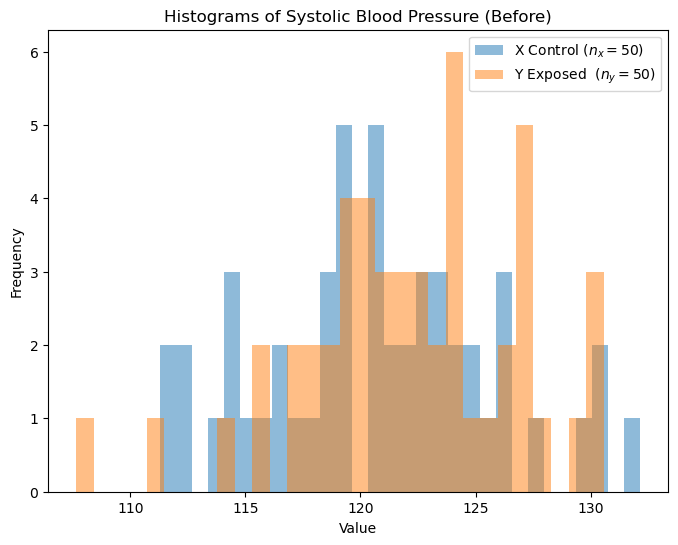

\\[\bar{x} =120.8 ,\quad \bar{y} =122.1\\]

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# Set the seed for reproducibility
np.random.seed(42)

# Generate samples
X = np.random.normal(122, np.sqrt(30), 50)
Y = np.random.normal(122, np.sqrt(30), 50)

# Plotting
plt.figure(figsize=(8, 6))

plt.hist(X, bins=30, alpha=0.5, label='X Control ($n_x = 50$)')
plt.hist(Y, bins=30, alpha=0.5, label='Y Exposed  ($n_y = 50$)')

plt.title('Histograms of Systolic Blood Pressure (Before)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

display(Markdown(r"\\[\bar{x} =" + f"{np.mean(X):.1f}" + 
                 r" ,\quad \bar{y} =" + f"{np.mean(Y):.1f}" + r"\\]"))



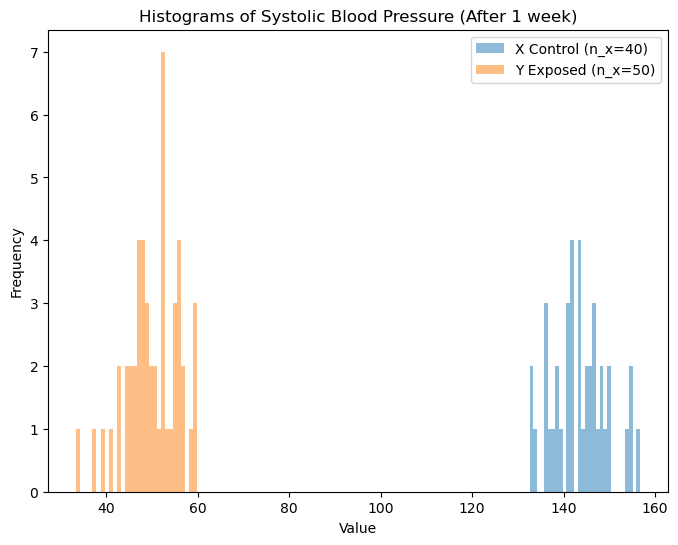

\\[\bar{x} =143.6 ,\quad \bar{y} =50.0\\]

\\[s_x =6.0 ,\quad s_y =5.8\\]

\\[s_x^2 = 36.3, \quad s_y^2 =33.8, \quad s_p^2 =34.9\\]

\\[s_x = 6.0, \quad s_y =5.8, \quad s_p =5.9\\]

\\[\bar{x} = 143.62, \quad \bar{y} = 49.98\\]

\\[SE_{\bar{x}-\bar{y}} = 7.40\\]

\\[t = 12.65\\]

\\[df = 88\\]

\\[p = 1.659307456321507e-21\\]

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# Set the seed for reproducibility
np.random.seed(42)

# Generate samples
X = np.random.normal(145, np.sqrt(40), 40)
Y = np.random.normal(50, np.sqrt(40), 50)

# Plotting
plt.figure(figsize=(8, 6))

plt.hist(X, bins=30, alpha=0.5, label='X Control (n_x=40)')
plt.hist(Y, bins=30, alpha=0.5, label='Y Exposed (n_x=50)')

plt.title('Histograms of Systolic Blood Pressure (After 1 week)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

display(Markdown(r"\\[\bar{x} =" + f"{np.mean(X):.1f}" + 
                 r" ,\quad \bar{y} =" + f"{np.mean(Y):.1f}" + r"\\]"))

display(Markdown(r"\\[s_x =" + f"{np.std(X):.1f}" + 
                 r" ,\quad s_y =" + f"{np.std(Y):.1f}" + r"\\]"))

# calculate pooled variance.
def pooled_variance(samplesx, samplesy):
    sx2 = np.var(samplesx, ddof=1)
    sy2 = np.var(samplesy, ddof=1)
    nx = len(samplesx)
    ny = len(samplesy)
    sp2 = ((nx-1) * sx2 + (ny-1) * sy2) / (nx + ny -2)
    return sp2

sp2 = pooled_variance(X, Y)

display(Markdown(r"\\[s_x^2 = " + f"{np.var(X, ddof=1):.1f}" + 
                 r", \quad s_y^2 =" + f"{np.var(Y, ddof=1):.1f}" +
                 r", \quad s_p^2 =" + f"{sp2:.1f}" + r"\\]"))

display(Markdown(r"\\[s_x = " + f"{np.std(X, ddof=1):.1f}" + 
                 r", \quad s_y =" + f"{np.std(Y, ddof=1):.1f}" +
                 r", \quad s_p =" + f"{(sp2**.5):.1f}" + r"\\]"))

xbar = np.mean(X)
ybar = np.mean(Y)
nx = len(X)
ny = len(Y)

SE = sp2 * (1/nx + 1/ny)**0.5
t = (xbar - ybar) / SE
display(Markdown(r"\\[\bar{x} = " + f"{xbar:.2f}" + r", \quad \bar{y} = " + f"{ybar:.2f}" + r"\\]"))

display(Markdown(r"\\[SE_{\bar{x}-\bar{y}} = " + f"{SE:.2f}" + r"\\]"))

display(Markdown(r"\\[t = " + f"{t:.2f}" + r"\\]"))

df = nx + ny -2

display(Markdown(r"\\[df = " + f"{df}" + r"\\]"))

from scipy import stats

# Assuming you have your t-statistic and degrees of freedom

# Calculate the p-value for a two-tailed test
p_value = stats.t.sf(abs(t), df) * 2

display(Markdown(r"\\[p = " + f"{p_value}" + r"\\]"))



\\(p << \alpha\\), so we reject \\(H_0\\) in favor of \\(H_A\\).

\\(H_A\\) states that \\(\bar{x}\\) and \\(\bar{y}\\) are 
significantly different.

Placed annotation at t=12.650360973245203


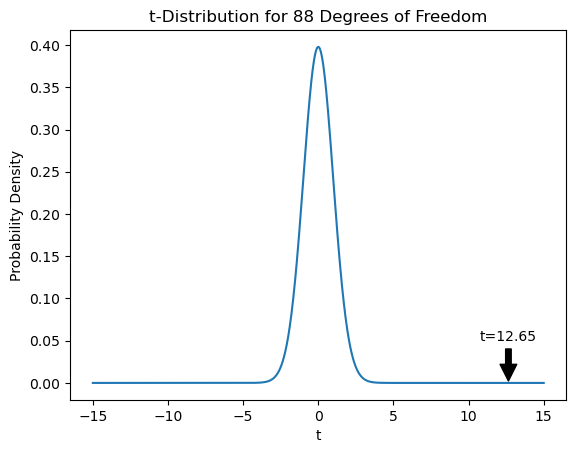

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

from IPython.display import display, Markdown

# Set the seed for reproducibility
np.random.seed(42)
df = nx + ny - 2  # compute degrees of freedom
x = np.linspace(-15, 15, 1000)  # Range of x values
y = t.pdf(x, df) 
plt.plot(x, y)

plt.xlabel('t')
plt.ylabel('Probability Density')
plt.title(f't-Distribution for {df} Degrees of Freedom')

specific_x = 0  # Specific x-value for the annotation
specific_y = t.pdf(specific_x, df)  # Calculate the y-value at this x

t_statistic = (xbar - ybar) / SE
print(f"Placed annotation at t={t_statistic}")

plt.annotate(f't={t_statistic:.2f}', (t_statistic, 0), 
              textcoords="offset points", 
              xytext=(0,30), 
              ha='center',
              arrowprops=dict(facecolor='black', shrink=0.05))


plt.show()

